In [1]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib as plt
import pandas as pd

In [2]:
df = pd.read_csv("../data/rentsmart.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64099 entries, 0 to 64098
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            64099 non-null  object 
 1   violation_type  64099 non-null  object 
 2   description     64099 non-null  object 
 3   address         64099 non-null  object 
 4   neighborhood    64099 non-null  object 
 5   zip_code        64099 non-null  int64  
 6   parcel          64099 non-null  int64  
 7   owner           64099 non-null  object 
 8   year_built      64099 non-null  int64  
 9   year_remodeled  64099 non-null  int64  
 10  property_type   64099 non-null  object 
 11  latitude        64099 non-null  float64
 12  longitude       64099 non-null  float64
 13  year            64099 non-null  int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 6.8+ MB


In [4]:
# List of official Ward-Precinct of District 7 accoring to https://www.boston.gov/sites/default/files/file/2022/08/2022%20Current%20Council%20Districts%20w%20new%20Wards_Precincts.pdf
# This is only an estimation. Only the ward-precinct where at least half of the area overlaps with City Council District 7 is included.
# Ward-Precinct 0410, 0406, 0407, 0412, 0402, 0901, and 0806 is excluded
D7_WDPC = ["0404", "0405", "0408", "0409", "0411", "0803", "0804", "0805", "0902", "0903", "0904", "0905", "0906", "0907", "1101", "1102", "1103", "1201", "1202", "1203", "1204", "1205", "1206", "1207", "1208", "1209", "1301", "1302", "1304"]

In [13]:
shapefile = gpd.read_file("../data/Boston_Precinct_Boundaries")

In [14]:

count = 0
is_D7_addresses = []

for row in df.itertuples(index=True, name="Row"):
    address_point = Point(row.longitude, row.latitude)
    address_gdf = gpd.GeoDataFrame(geometry=[address_point], crs="EPSG:4326")
    address_gdf = address_gdf.to_crs(shapefile.crs)
    result = gpd.sjoin(address_gdf, shapefile, how="left", predicate="intersects")

    if result['WDPCT'].values[0] in D7_WDPC:
        count += 1
        is_D7_addresses.append(True)
    else:
        is_D7_addresses.append(False)

print(count)

21875


In [15]:
df['is_d7'] = is_D7_addresses
df

,date,violation_type,description,address,neighborhood,zip_code,parcel,owner,year_built,year_remodeled,property_type,latitude,longitude,year,is_d7
0,2024-10-02,Enforcement Violations,Improper storage trash: res,"1081-1083 Dorchester Ave, 02125",Dorchester,2125,1302139000,DORCHESTER FIRST REALTY TRUST,1905,2014,Residential 3-family,42.313779,-71.057314,2024,False
1,2024-10-02,Enforcement Violations,Improper storage trash: res,"6 Dawes Ter, 02125",Dorchester,2125,703977000,MADEK CHARLES V,1905,1970,Residential 3-family,42.318930,-71.060761,2024,False
2,2024-10-02,Enforcement Violations,Overfilling of barrel/dumpster,"7 Bakersfield St, 02125",Dorchester,2125,1301796000,CESCO LLC MASS LLC,1936,1981,Residential 7 or more units,42.317846,-71.060866,2024,False
3,2024-10-01,Enforcement Violations,Overgrown Weeds On Property,"27 Woodbine St, 02119",Roxbury,2119,1200848000,WHITE GILBERT G III,1890,2010,Residential 1-family,42.318880,-71.079861,2024,True
4,2024-10-01,Enforcement Violations,illegal parking prop owner 1,"2 Humboldt Ave, 02119",Roxbury,2119,1201598250,TWO HUMBOLDT AV CONDO TR,1999,1999,Condominium Main*,42.320570,-71.085741,2024,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64094,2019-10-29,Housing Complaints,Unsatisfactory Living Conditions,"45 Dwight St #A, 02118",Roxbury,2118,305741000,HISTORIC SOUTH END LP MASS LP,1900,1990,Residential 7 or more units,42.344531,-71.069138,2019,False
64095,2019-10-29,Housing Complaints,Plumbing,"610 Tremont St, 02118",Roxbury,2118,900091000,PHIL C BRADLEY HOUSING,1920,1998,Mixed Use (Res. and Comm.),42.342540,-71.073708,2019,False
64096,2019-10-29,Housing Complaints,Unsatisfactory Living Conditions,"56 Bowdoin Ave #4, 02121",Dorchester,2121,1401292000,ALLEN MARY ANN,1950,2004,Residential 7 or more units,42.301370,-71.074491,2019,False
64097,2019-10-29,Housing Complaints,Rental Unit Delivery Conditions,"5 S Charlame Ct, 02119",Roxbury,2119,1201125000,CHARLAME PARK HOMES I COOP,1964,1990,Residential 7 or more units,42.319490,-71.085619,2019,True


In [16]:
df.to_csv("../data/d7-rentsmart-new.csv", index=False)

In [17]:
d7_df = pd.read_csv("../data/d7-rentsmart-new.csv")

In [18]:
d7_df = d7_df[d7_df["is_d7"] == True]
d7_df

,date,violation_type,description,address,neighborhood,zip_code,parcel,owner,year_built,year_remodeled,property_type,latitude,longitude,year,is_d7
3,2024-10-01,Enforcement Violations,Overgrown Weeds On Property,"27 Woodbine St, 02119",Roxbury,2119,1200848000,WHITE GILBERT G III,1890,2010,Residential 1-family,42.318880,-71.079861,2024,True
4,2024-10-01,Enforcement Violations,illegal parking prop owner 1,"2 Humboldt Ave, 02119",Roxbury,2119,1201598250,TWO HUMBOLDT AV CONDO TR,1999,1999,Condominium Main*,42.320570,-71.085741,2024,True
5,2024-10-01,Enforcement Violations,Overfilling of barrel/dumpster,"27 Highland Ave #1, 02119",Roxbury,2119,903516000,ROXBURY HIGHLAND LLC MASS LLC,1899,1990,Residential 7 or more units,42.329218,-71.092823,2024,True
6,2024-10-01,Housing Violations,"The owner shall provide, install and maintain ...","497 Columbus Ave #2, 02118",Roxbury,2118,402437000,HALEY HOUSE INC,1910,2013,Residential 7 or more units,42.342690,-71.079531,2024,True
7,2024-10-01,Housing Violations,The owner of a residence containing two or mor...,"497 Columbus Ave #2, 02118",Roxbury,2118,402437000,HALEY HOUSE INC,1910,2013,Residential 7 or more units,42.342690,-71.079531,2024,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64089,2019-10-29,Housing Complaints,Maintenance - Homeowner,"756 Tremont St, 02118",Roxbury,2118,900681000,SEVEN 56 TREMONT ST CONDO TR,1999,2015,Condominium Main*,42.339730,-71.079011,2019,True
64091,2019-10-29,Housing Complaints,Contractors Complaint,"65 Worcester St #65-1, 02118",Roxbury,2118,900557010,SIXTY5-67 WORCESTER STREET,1899,1999,Condominium Main*,42.339240,-71.077481,2019,True
64092,2019-10-29,Housing Complaints,Rental Unit Delivery Conditions,"122 Mount Pleasant Ave # 2, 02119",Roxbury,2119,802750000,ROXBURY TRIANGLE INC,1900,1989,Residential 7 or more units,42.325070,-71.076611,2019,True
64093,2019-10-29,Housing Complaints,Rental Unit Delivery Conditions,"122 Mount Pleasant Ave # 1, 02119",Roxbury,2119,802750000,ROXBURY TRIANGLE INC,1900,1989,Residential 7 or more units,42.325070,-71.076611,2019,True


KeyboardInterrupt: 

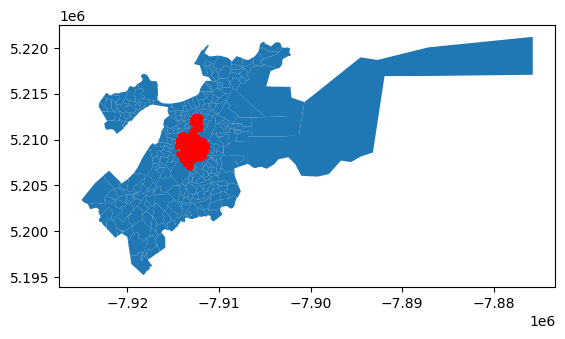

In [12]:
boston_map = shapefile.plot()

for row in d7_df.itertuples(index=True, name="Row"):
    if row.longitude and row.latitude:
        # Create a point for the address
        address_point = Point(row.longitude, row.latitude)
        
        # Create a GeoDataFrame for the point and reproject to match shapefile CRS
        address_gdf = gpd.GeoDataFrame(geometry=[address_point], crs="EPSG:4326")
        address_gdf = address_gdf.to_crs(shapefile.crs)
        
        # Optionally, perform spatial join to check if it intersects with the shapefile
        result = gpd.sjoin(address_gdf, shapefile, how="left", predicate="intersects")
        
        # Plot the point on the same axis
        address_gdf.plot(ax=boston_map, color='red', markersize=5)